In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
v = pd.read_csv("../../data/processed/V.csv")
fgr = pd.read_csv("../../data/processed/FGR.csv", decimal=",")

In [3]:
v.drop(columns=["Unnamed: 0"], inplace=True)

# Gerando variavel demanda diaria por linha

In [4]:
demanda_p_linha_dia = v.groupby(["linha_numero", "movimento_diario_data_mov"]).count()["passageiro_matricula"].to_frame().reset_index()
demanda_p_linha_dia.rename(columns={"passageiro_matricula": "demanda_do_dia"}, inplace = True)

In [5]:
demanda_p_linha_dia

,linha_numero,movimento_diario_data_mov,demanda_do_dia
0,1,2021-08-29,232
1,1,2021-08-31,9096
2,1,2021-09-01,8888
3,1,2021-09-02,8244
4,1,2021-09-03,9020
...,...,...,...
2078,942,2021-09-05,2
2079,991,2021-08-31,76
2080,991,2021-09-01,55
2081,991,2021-09-02,55


# Validação Hipótese
##### O tamanho do trajeto se correlaciona positivamente com a demanda.

In [6]:
fgr

,Unnamed: 0,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
0,0,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte BUM,14,47.2,49.2
1,1,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade,27,0.0,0.0
2,2,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Vale Transporte,1636,5654.4,5654.4
3,3,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Gratuidade p/ deficiente,140,0.0,0.0
4,4,2021-09-01,2,Auto Viação Fortaleza Ltda,4,Messejana/Papicu/Cambeba/TJ,1165.12,1147.14,98.46,Meia,193,298.0,298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17525,2036,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Gratuidade,44,0.0,0.0
17526,2037,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Vale Transporte,767,2657.4,2657.4
17527,2038,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Gratuidade p/ deficiente,21,0.0,0.0
17528,2039,2021-09-07,67,COOTRAPS - Coop. dos Transp. Aut. de Pas,757,Vila Velha/Centro,855.00,700.56,81.94,Vale Transporte BUM,8,26.8,28.8


In [7]:
linha_p_km_programado = fgr[["fechamento_data", "linha_numero", "linha_km_programado"]].drop_duplicates()

In [8]:
linha_p_km_programado = linha_p_km_programado[linha_p_km_programado.linha_km_programado != 0]

In [9]:
linha_demanda_km = demanda_p_linha_dia.merge(linha_p_km_programado, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_km.drop(columns=["fechamento_data"], inplace=True)
linha_demanda_km = linha_demanda_km.groupby(["linha_numero", "movimento_diario_data_mov"]).mean()

<AxesSubplot:>

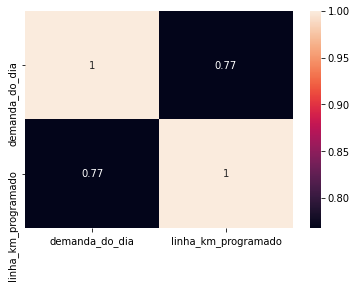

In [10]:
sb.heatmap(linha_demanda_km.corr(), annot=True)

Conclusão: o tamanho do trajeto se correlaciona positivamente com a demanda.

##### O tipo de passagem mais utilizada na linha influencia na demanda da mesma.

In [11]:
fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index().passageiro_grupo.value_counts()

Vale Transporte BUM    1670
Vale Transporte         304
Gratuidade                8
Name: passageiro_grupo, dtype: int64

In [12]:
linhas_max_tip_passageiro = fgr.groupby(["linha_numero", "fechamento_data"]).max()["passageiro_grupo"].to_frame().reset_index()

In [13]:
fgr[(fgr.linha_numero == 1) & (fgr.fechamento_data == "2021-09-07")]

,Unnamed: 0,fechamento_data,empresa_numero,empresa_nome,linha_numero,linha_nome,linha_km_programado,linha_km_adotado,linha_eficiencia,passageiro_grupo,passageiro_demanda,passageiro_arrecadacao,passageiro_arrecadacao_prevista
16383,894,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Inteira,1174,4226.4,4226.4
16384,895,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Meia,115,181.6,181.6
16385,896,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Gratuidade,1,0.0,0.0
16386,897,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte,79,270.0,270.0
16387,898,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Integracao,8,0.0,0.0
16388,899,2021-09-07,21,Transportes Urbanos Aliança S/A,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte BUM,1,3.6,3.6
17221,1732,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Gratuidade,606,2116.8,2116.8
17222,1733,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte,2228,7722.6,7722.6
17223,1734,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Meia,163,247.6,247.6
17224,1735,2021-09-07,36,Santa Cecília Transportes Ltda.,1,Terminal Antônio Bezerra,0.0,0.0,0.0,Vale Transporte BUM,249,460.2,864.2


In [14]:
linha_demanda_tip_passageiro = demanda_p_linha_dia.merge(linhas_max_tip_passageiro, how="inner", left_on=["linha_numero", "movimento_diario_data_mov"], right_on=["linha_numero","fechamento_data"])
linha_demanda_tip_passageiro.drop(columns=["fechamento_data"], inplace = True)
linha_demanda_tip_passageiro.rename(columns={"passageiro_grupo": "tip_pass_mais_freq"}, inplace = True)

In [15]:
linha_demanda_tip_passageiro

,linha_numero,movimento_diario_data_mov,demanda_do_dia,tip_pass_mais_freq
0,1,2021-09-01,8888,Vale Transporte BUM
1,1,2021-09-02,8244,Vale Transporte BUM
2,1,2021-09-03,9020,Vale Transporte BUM
3,1,2021-09-04,6572,Vale Transporte BUM
4,1,2021-09-05,4167,Vale Transporte BUM
...,...,...,...,...
1725,920,2021-09-05,2350,Vale Transporte BUM
1726,920,2021-09-06,2345,Vale Transporte BUM
1727,991,2021-09-01,55,Vale Transporte BUM
1728,991,2021-09-02,55,Vale Transporte BUM


In [16]:
linha_demanda_tip_passageiro.describe()

,linha_numero,demanda_do_dia
count,1730.000000,1730.000000
mean,382.506936,1736.750867
std,262.673196,1982.421598
min,1.000000,1.000000
25%,108.000000,502.000000
50%,357.000000,1070.000000
75%,631.000000,2095.250000
max,999.000000,15203.000000


(2095 - 502)*1.5 + 2095 = Limite Superior = 4485

In [17]:
linha_demanda_tip_passageiro.query("demanda_do_dia <= 4485", inplace=True)

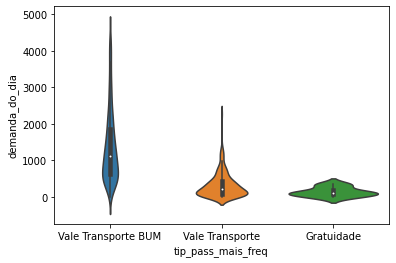

In [18]:
sb.violinplot(data=linha_demanda_tip_passageiro, x="tip_pass_mais_freq", y="demanda_do_dia");

Devido ao desbalanceamento, não podemos considerar o tipo de passageiro mais frequente como algo que se correlaciona com a demanda.

##### A demanda é maior entre os horários de 06h às 09h e 17h às 19h em comparação aos outros.

In [19]:
v.head()

,movimentos_data_arq,movimento_diario_data_mov,categoria_tipo,empresa_codigo,empresa_modalidade,veiculo_numero,veiculo_validador,linha_numero,linha_jornada,linha_num_operador,...,passageiro_data_hora,passageiro_integracao_bum,passageiro_valor_subsidio,passageiro_evento,passageiro_sigben,passageiro_integracao,passageiro_valor_pago,passageiro_tipo,passageiro_matricula,passageiro_valor_repasse_metro
0,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:37:51,0,0,4219114872,0,0,3.6,4,7308696,0.0
1,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:40:11,0,0,4219114873,0,0,3.6,4,6423497,0.0
2,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:40:16,0,0,4219114874,0,0,3.6,12,5063339,0.0
3,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:41:06,0,0,4219114875,0,0,3.6,4,4792159,0.0
4,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,2021-08-26T05:42:21,0,0,4219114876,0,0,3.6,4,3125993,0.0


In [20]:
v.passageiro_data_hora.describe()

count                 3641303
unique                 486947
top       2021-09-02T06:25:39
freq                       38
Name: passageiro_data_hora, dtype: object

In [21]:
v["passageiro_data_hora"]

0          2021-08-26T05:37:51
1          2021-08-26T05:40:11
2          2021-08-26T05:40:16
3          2021-08-26T05:41:06
4          2021-08-26T05:42:21
                  ...         
3641298    2021-09-06T19:14:25
3641299    2021-09-06T19:22:11
3641300    2021-09-06T19:22:30
3641301    2021-09-06T19:34:20
3641302    2021-09-07T00:00:03
Name: passageiro_data_hora, Length: 3641303, dtype: object

In [22]:
v["passageiro_data_hora"] = pd.to_datetime(v["passageiro_data_hora"])

In [23]:
v["passageiro_hora_entrada"] = v["passageiro_data_hora"].dt.hour

<AxesSubplot:>

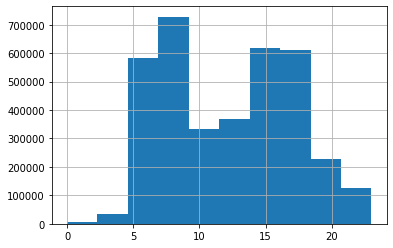

In [24]:
v["passageiro_hora_entrada"].hist()

In [44]:
v["passageiro_hora_range"] = pd.cut(v["passageiro_hora_entrada"], bins=[-1, 6, 9, 12, 15, 18, 21, float('Inf')], labels=['00-5h59', '6-8h59', '9-11h59', '12-14h59', '15-17h59', '18-20h59', '21-23h59'])

In [26]:
hour_ranges = {"6-8h59": [6, 7, 8],
              "9-11h59": [9, 10, 11],
              "12-14h59": [12, 13, 14],
              "15-17h59": [15, 16, 17],
              "18-20h59": [18, 19, 20],
              "21-23h59": [21, 22, 23]}

# for index, row in v.iterrows():
#  passanger_hour = row["passageiro_data_hora"].hour
#  for k, v in hour_ranges.items():
#    if passanger_hour in v:
#      row["passageiro_hora_range"] = k


In [27]:
v["passageiro_hora_range"].value_counts()

15-17h59    869222
6-8h59      728089
00-5h59     626114
12-14h59    534716
9-11h59     527937
18-20h59    285469
21-23h59     69756
Name: passageiro_hora_range, dtype: int64

In [28]:
v["passageiro_hora_range"].isnull().sum()

0

In [29]:
v

,movimentos_data_arq,movimento_diario_data_mov,categoria_tipo,empresa_codigo,empresa_modalidade,veiculo_numero,veiculo_validador,linha_numero,linha_jornada,linha_num_operador,...,passageiro_valor_subsidio,passageiro_evento,passageiro_sigben,passageiro_integracao,passageiro_valor_pago,passageiro_tipo,passageiro_matricula,passageiro_valor_repasse_metro,passageiro_hora_entrada,passageiro_hora_range
0,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114872,0,0,3.6,4,7308696,0.0,5,00-5h59
1,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114873,0,0,3.6,4,6423497,0.0,5,00-5h59
2,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114874,0,0,3.6,12,5063339,0.0,5,00-5h59
3,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114875,0,0,3.6,4,4792159,0.0,5,00-5h59
4,2021-09-01,2021-08-26,1,42,1,42717,860E,633,1,196769,...,0,4219114876,0,0,3.6,4,3125993,0.0,5,00-5h59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641298,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,4222094572,0,0,0.0,16,6543500,0.0,19,18-20h59
3641299,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,4222094573,0,0,3.6,4,8747915,0.0,19,18-20h59
3641300,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,2258250790,0,0,3.6,0,0,0.0,19,18-20h59
3641301,2021-09-07,2021-09-06,1,67,2,67959,860E,359,1,171678,...,0,0,0,3,0.0,0,0,0.0,19,18-20h59


In [30]:
v_hora_range = v.groupby(["linha_numero", "movimento_diario_data_mov", "passageiro_hora_range"]).count()["passageiro_matricula"].to_frame().reset_index()

In [31]:
v_hora_range.dropna(inplace=True)

In [32]:
v_hora_range

,linha_numero,movimento_diario_data_mov,passageiro_hora_range,passageiro_matricula
63,1,2021-08-29,00-5h59,4.0
64,1,2021-08-29,6-8h59,74.0
65,1,2021-08-29,9-11h59,97.0
66,1,2021-08-29,12-14h59,57.0
77,1,2021-08-31,00-5h59,2021.0
...,...,...,...,...
41976,991,2021-08-31,15-17h59,75.0
41983,991,2021-09-01,15-17h59,55.0
41990,991,2021-09-02,15-17h59,55.0
42143,999,2021-09-05,12-14h59,82.0


In [34]:
import plotly.express as px

fig = px.violin(v_hora_range, y="passageiro_matricula", x="passageiro_hora_range", box=True,
          hover_data=v_hora_range.columns)
fig.show()

**00h - 5h59**

75%  das rotas tiverem até  434 pessoas

25%  das rotas tiverem até  96 pessoas

---
**06h - 8h59**

75%  das rotas tiverem até  451 pessoas

25%  das rotas tiverem até  126 pessoas

---
**09h - 11h59**

75%  das rotas tiverem até  342 pessoas

25%  das rotas tiverem até  96 pessoas

---
**12h - 14h59**

75%  das rotas tiverem até  332 pessoas

25%  das rotas tiverem até  76 pessoas

---
**15h - 17h59**

75%  das rotas tiverem até  516 pessoas

25%  das rotas tiverem até  112 pessoas

---
**18 - 20h59**

75%  das rotas tiverem até  164 pessoas

25%  das rotas tiverem até  33 pessoas

---
**21 - 23h59**

75%  das rotas tiverem até  40 pessoas

25%  das rotas tiverem até  7 pessoas



In [37]:
v_hora_range_dummies = pd.get_dummies(v_hora_range["passageiro_hora_range"])

In [40]:
v_hora_range = pd.concat([v_hora_range, v_hora_range_dummies], axis=1)

<AxesSubplot:>

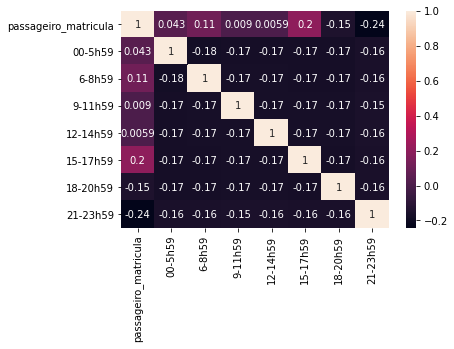

In [43]:
sb.heatmap(v_hora_range.drop(columns=["linha_numero"]).corr(), annot=True)

Existe uma certa correlação entre horário e a demanda. Notamos que horário entre 06h - 8h59 e 15h - 17h59 possuem uma demanda maior do que os outros horários. As menores demandas se encontram em horário noturno (após as 18h).

Existe uma certa demanda pela madrugada, provavelmente pelas pessoas que moram na região metropolitana ou muito distante de onde trabalham (o que necessita estas pegarem onibus mais cedo).